# Regresión Lineal Múltiple

La regresión lineal múltiple es el mismo concepto que la regresión lineal Simple , pero con N variables independientes. 

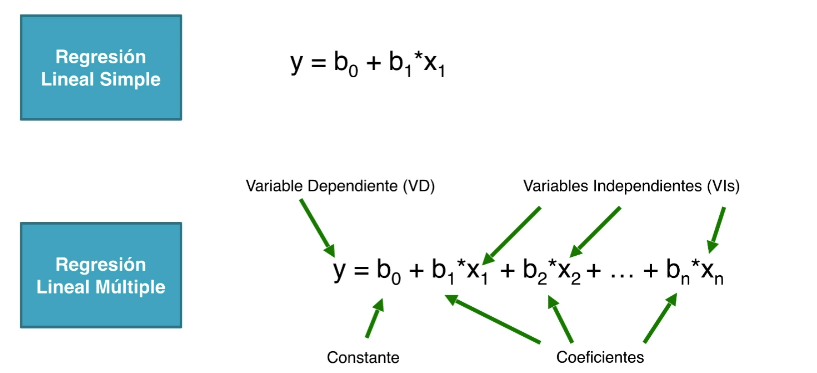

En el dataset que vamos a trabajar a continuación, por ejemplo, tenemos varias variables independientes, como dinero gastado por administración, por Marketing y el país.


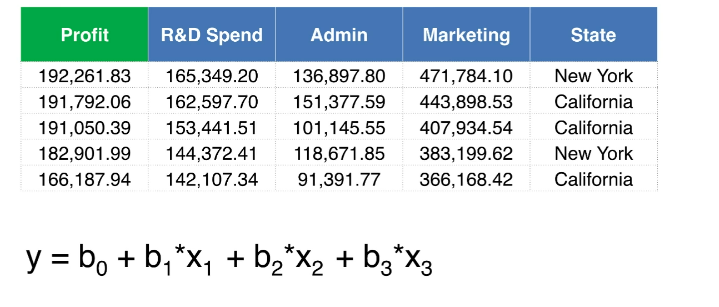

# Métodos para contruir modelos de Regresion lineal multiple.

Cuando tenemos varias variables independientes no tenemos por qué usarlas todas, de hecho un modelo con menos variables dependientes que predice lo mismo que otro con más es un modelo mejor. Para ello existen varios métodos para decidir que variables utilizar para construir el modelo.

1.   ALL-IN
2.   Eliminación hacia atrás
3.   Selección hacia adelante
4.   Eliminación Bidireccional.
5.   Comparación de scores.

## ALL-IN
Consiste básicamente en utilizar todas las variables.

## Eliminación hacia atrás
Se comienza
incluyendo todas las variables en el modelo de regresión y se van eliminando regresores
progresivamente de menor a mayor contribución específica hasta que esta sea lo suficientemente
significativa como para no poder ser eliminada

## Selección hacia adelante

Las variables se introducen secuencialmente en el modelo.
La primera variable que se introduce es la de mayor correlación (+ o -) con la variable dependiente.
Dicha variable se introducirá en la ecuación solo si cumple el criterio de entrada.
A continuación se considera la variable independiente cuya correlación parcial sea la mayor y que no esté en la ecuación.
El procedimiento termina cuando ya no quedan variables que cumplan el criterio de entrada.

## Eliminación Bidireccional.
Este método es una combinación de los procedimientos anteriores.
En cada paso se introduce la variable independiente que no se encuentre ya en la ecuación y que tenga la probabilidad para F más pequeña (i.e. hacia adelante).
Las variables ya introducidas en la ecuación de regresión pueden ser eliminadas del modelo (i.e. hacia atrás).
El método termina cuando ya no hay más variables candidatas a ser incluidas o eliminadas.

##Comparación de scores.
Generamos todos los posibles modelos con la combinación de variables y nos quedamos con el mejor.

#Preparamos el entorno

In [32]:
!pip install sklearn
from google.colab import drive # Montar tu Google drive
from google.colab import drive
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


!git clone https://github.com/alexxsnjr/machine_learning-examples.git
drive.mount('/content/drive')

dataset = pd.read_csv('/content/machine_learning-examples/datasets/50_Startups.csv')

print("------dataset-------")
print(dataset)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'machine_learning-examples' already exists and is not an empty directory.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
------dataset-------
    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148

# Codificar datos categóricos

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = make_column_transformer((OneHotEncoder(), [3]), remainder = "passthrough")
X = onehotencoder.fit_transform(X)

print("One hot encodig para la columna de estado")
print(X)

One hot encodig para la columna de estado
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299

# Evitar la trampa de las variables ficticias
Cuando usamos variables dummy como el caso de los estados, no podemos pasar todas las columnas creadas por el oneHotEncoding. Siempre se deja una columna sin pasar para evitar caer en falta de multicolinealidad.

La Falta de multicolinealidad: la regresión lineal múltiple asume que las variables independientes no están altamente correlacionadas entre sí. Esta suposición se prueba utilizando valores del factor de inflación de varianza (VIF).

Por lo que si añadimos todas las variables dummy la ultima variable creara multicolinealidad con b0.

Como D2=1−D1 entonces si calculamos tanto D1 como D2

obtenmos:

```
y = b0+b1x1+b2x2+b3x3+b4D1+b5D2
= b0+b1x1+b2x2+b3x3+b4D1+b5(1−D1)
= b0+b5+b1x1+b2x2+b3x3+(b4−b5)D1
= b∗0+b1x1+b2x2+b3x3+b∗4D1
```
con

```
 b∗0=b0+b5 y  b∗4=b4−b5
```



Por lo tanto, la información de la variable ficticia redundante D2
entra a formar parte de la constante b0.

In [34]:
X = X[:, 1:]
print(X)

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 77044.01 99281.34 140574.81]
 [0

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train, y_train)

[[1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 1.0 46014.02 85047.44 205517.64]
 [1.0 0.0 75328.87 144135.98 134050.07]
 [0.0 0.0 46426.07 157693.92 210797.67]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 1000.23 124153.04 1903.93]
 [0.0 1.0 542.05 51743.15 0.0]
 [0.0 1.0 65605.48 153032.06 107138.38]
 [0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 61994.48 115641.28 91131.24]
 [0.0 0.0 63408.86 129219.61 46085.25]
 [0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 23640.93 96189.63 148001.11]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 1.0 15505.73 127382.3 35534.17]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 0.0 64664.71 139553.16 137962.62]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 0.0 28754.33 118546.05 172795.67]
 [0.0 0.0 0.0 116983.8 45173.06]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 93863.75 1273

# Ajustar el modelo de Regresión lineal múltiple con el conjunto de entrenamiento


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

# Predicción de los resultados en el conjunto de testing


In [38]:
y_pred = regression.predict(X_test)

In [39]:
#comparamos resultados 
print(y_test[0])
print(y_pred[0])

103282.38
103015.20159796216


# Construir el modelo óptimo de RLM utilizando la Eliminación hacia atrás

Para ello usaremos la libreria Statsmodels y usaremos todo el dataset, no dividiremos en entrenamiento y test ya que solo queremos averiguar que variables son  las mejores para entrenar el modelo, no entrenarlo de verdad.

In [40]:
import statsmodels.api as sm
#Añadimos una columna al inicio de unos para simular el valor dependiente
print(X)
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
print("Añadido al inicio el valor 1")
print(X)
SL = 0.05

[[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 0.0 91992.39 135495.07 252664.93]
 [1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 1.0 114523.61 122616.84 261776.23]
 [0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 1.0 94657.16 145077.58 282574.31]
 [1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [1.0 0.0 67532.53 105751.03 304768.73]
 [0.0 1.0 77044.01 99281.34 140574.81]
 [0

In [41]:
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.34e-27
Time:                        19:03:37   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Ahora buscamos la variable con mayor valor de significación (P valor) y  la eliminamos, en este caso es X2 con un 0.953

In [42]:
X_opt = X[:, [0, 1, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 23 May 2023   Prob (F-statistic):           8.49e-29
Time:                        19:04:49   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

La siguiente variable a eliminar es la X1 con 0.940 SL (nivel de significación) 




In [43]:
X_opt = X[:, [0, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 23 May 2023   Prob (F-statistic):           4.53e-30
Time:                        19:05:45   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Y continuamos repitiendo este proceso hasta que no haya ninguna variable con un P-valor mayor al nivel de significación 0.05

```
# Tiene formato de código
```



In [44]:

X_opt = X[:, [0, 3, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

X_opt = X[:, [0, 3]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 23 May 2023   Prob (F-statistic):           3.50e-32
Time:                        19:07:05   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Así concluimos que el mejor modelo que podemos utilizar para esta regresión múltiple es un modelo de regresión simple con 1 sola variable, en este caso la inversión en I+D.

Este ejemplo puede ser un poco drástico, puesto que hemos eliminado variables independientes solamente comparando el p-valor, y esto puede ser peligroso. Lo mejor es tener más criterios de eliminación que veremos más adelante, pero aquí dejamos un código para hacer la eliminación hacia atrás de forma automática comparado el p-valor y el R-squeared.


```
    import statsmodels.formula.api as sm
    def backwardElimination(x, SL):    
        numVars = len(x[0])    
        temp = np.zeros((50,6)).astype(int)    
        for i in range(0, numVars):        
            regressor_OLS = sm.OLS(y, x.tolist()).fit()        
            maxVar = max(regressor_OLS.pvalues).astype(float)        
            adjR_before = regressor_OLS.rsquared_adj.astype(float)        
            if maxVar > SL:            
                for j in range(0, numVars - i):                
                    if (regressor_OLS.pvalues[j].astype(float) == maxVar):                    
                        temp[:,j] = x[:, j]                    
                        x = np.delete(x, j, 1)                    
                        tmp_regressor = sm.OLS(y, x.tolist()).fit()                    
                        adjR_after = tmp_regressor.rsquared_adj.astype(float)                    
                        if (adjR_before >= adjR_after):                        
                            x_rollback = np.hstack((x, temp[:,[0,j]]))                        
                            x_rollback = np.delete(x_rollback, j, 1)     
                            print (regressor_OLS.summary())                        
                            return x_rollback                    
                        else:                        
                            continue    
        regressor_OLS.summary()    
        return x 
     
    SL = 0.05
    X_opt = X[:, [0, 1, 2, 3, 4, 5]]
    X_Modeled = backwardElimination(X_opt, SL)
```

